# ToDo:


1.   Define baseline model, do encoding
2.   Start building models on baseline model, using:
    1.   Naive Bayes
    2.   Logistic Regression
    3.   K-Nearest Neighbors (KNN)         
    4.   SVM ( optional )

3.   Compare the results of first modues. Try to improve logistic regression.

4.   Then go back to preparation part, and compare how it reflects on model quality.

# Set up

In [3]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a987173ce78e79be6a0e08878d947c1c48a5dd92efdb52eb6ec155eddce0fc0b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")

import os

from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# library for exporting dataset
from google.colab import files

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/df_prepared.csv'
df = pd.read_csv(path, sep=',')

In [7]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_encoded,RainTomorrow_encoded,Georegion,ElevationZone,ClimaticZone,AdminReg,Latitude,Longitude,Month,Season,Evaporation,Cloud9am
0,2008-12-01,Albury,0.188978,-0.047262,-0.250908,0.050496,W,0.323625,W,WNW,0.674442,0.611889,0.114095,-1.432044,-1.469626,-1.216459,0.207539,-0.013048,0.016522,No,No,0,0,Southeastern Australia,Lowland,Temperate,New South Wales,0.548407,0.404652,December,Winter,-0.118178,1.458449
1,2008-12-02,Albury,-0.749171,0.262153,-0.354204,1.227870,WNW,0.323625,NNW,WSW,-1.131835,0.383290,-1.308954,-1.286263,-1.041445,-1.112085,-1.371553,0.033195,0.379679,No,No,0,0,Southeastern Australia,Lowland,Temperate,New South Wales,0.548407,0.404652,December,Winter,-0.118178,0.153124
2,2008-12-03,Albury,0.110799,0.346539,-0.354204,0.906768,WSW,0.479084,W,WSW,0.561550,0.840488,-1.625187,-1.043296,-1.484391,-0.977891,-1.039112,0.618935,0.219890,No,No,0,0,Southeastern Australia,Lowland,Temperate,New South Wales,0.548407,0.404652,December,Winter,-0.118178,0.153124
3,2008-12-04,Albury,-0.467726,0.670018,-0.354204,1.025068,NE,-1.230975,SE,E,-0.341589,-1.102601,-1.256248,-1.723605,-0.007903,-0.366562,-0.706672,0.171923,0.699257,No,No,0,0,Southeastern Australia,Lowland,Temperate,New South Wales,0.548407,0.404652,December,Winter,-0.118178,0.153124
4,2008-12-05,Albury,0.830047,1.274783,-0.182044,-0.163572,W,0.090435,ENE,NW,-0.793158,0.154692,0.693856,-0.897515,-1.011915,-1.380474,1.454190,0.125680,1.164098,No,No,0,0,Southeastern Australia,Lowland,Temperate,New South Wales,0.548407,0.404652,December,Winter,-0.118178,1.023340


# Defining base model

For the baseline model I'd have all features that I had from the start, with a few exceptions:
- I will remove Date, and encode **seasons** and **months**
- I will remove City, and in order to encode less amount of variants: **Georegion**
- remove Raintomorrow and Raintoday initial records ( leave only encoded )
- I need to encode wind direction

## Mapping wind directions

In [9]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [10]:
wind_mapping = {
    'N': 'North', 'NNE': 'North', 'NE': 'North', 'NNW': 'North',
    'S': 'South', 'SSE': 'South', 'SE': 'South', 'SSW': 'South',
    'E': 'East', 'ENE': 'East', 'ESE': 'East',
    'W': 'West', 'WNW': 'West', 'WSW': 'West', 'NW': 'West', 'SW': 'West'
}

In [11]:
df['WindGustDir'] = df['WindGustDir'].map(wind_mapping)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_mapping)
df['WindDir9am'] = df['WindDir9am'].map(wind_mapping)

## Baseline model scope

In [12]:
df_baseline = df.drop(['Date', 'Location', 'RainTomorrow', 'RainToday', 'Latitude', 'Longitude', 'AdminReg', 'ClimaticZone', 'ElevationZone'], axis=1)

In [13]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141006 entries, 0 to 141005
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MinTemp               141006 non-null  float64
 1   MaxTemp               141006 non-null  float64
 2   Rainfall              141006 non-null  float64
 3   Sunshine              141006 non-null  float64
 4   WindGustDir           141006 non-null  object 
 5   WindGustSpeed         141006 non-null  float64
 6   WindDir9am            141006 non-null  object 
 7   WindDir3pm            141006 non-null  object 
 8   WindSpeed9am          141006 non-null  float64
 9   WindSpeed3pm          141006 non-null  float64
 10  Humidity9am           141006 non-null  float64
 11  Humidity3pm           141006 non-null  float64
 12  Pressure9am           141006 non-null  float64
 13  Pressure3pm           141006 non-null  float64
 14  Cloud3pm              141006 non-null  float64
 15  

# Hot-encoding Catigorical variables

In [14]:
wind_dummies = pd.get_dummies(df_baseline['WindGustDir'], prefix='WindGustDir')
#wind_dummies.head()
df_baseline = pd.concat([df_baseline, wind_dummies], axis=1)
df_baseline = df_baseline.drop('WindGustDir', axis=1)

In [15]:
wind_dummies3pm = pd.get_dummies(df_baseline['WindDir3pm'], prefix='WindDir3pm')
df_baseline = pd.concat([df_baseline, wind_dummies3pm], axis=1)
df_baseline = df_baseline.drop('WindDir3pm', axis=1)

wind_dummies9am = pd.get_dummies(df_baseline['WindDir9am'], prefix='WindDir9am')
df_baseline = pd.concat([df_baseline, wind_dummies9am], axis=1)
df_baseline = df_baseline.drop('WindDir9am', axis=1)

In [16]:
geo_dummies = pd.get_dummies(df_baseline['Georegion'], prefix='Georegion')
df_baseline = pd.concat([df_baseline, geo_dummies], axis=1)
df_baseline = df_baseline.drop('Georegion', axis=1)

In [17]:
month_dummies = pd.get_dummies(df_baseline['Month'], prefix='Month')
df_baseline = pd.concat([df_baseline, month_dummies], axis=1)
df_baseline = df_baseline.drop('Month', axis=1)

In [18]:
season_dummies = pd.get_dummies(df_baseline['Season'], prefix='Season')
df_baseline = pd.concat([df_baseline, season_dummies], axis=1)
df_baseline = df_baseline.drop('Season', axis=1)

In [19]:
df_baseline.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday_encoded,RainTomorrow_encoded,Evaporation,Cloud9am,WindGustDir_East,WindGustDir_North,WindGustDir_South,WindGustDir_West,WindDir3pm_East,WindDir3pm_North,WindDir3pm_South,WindDir3pm_West,WindDir9am_East,WindDir9am_North,WindDir9am_South,WindDir9am_West,Georegion_Central Australia,Georegion_Eastern Australia,Georegion_External Territory,Georegion_Northern Australia,Georegion_Southeastern Australia,Georegion_Southern Australia,Georegion_Tasmania,Georegion_Western Australia,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0.188978,-0.047262,-0.250908,0.050496,0.323625,0.674442,0.611889,0.114095,-1.432044,-1.469626,-1.216459,0.207539,-0.013048,0.016522,0,0,-0.118178,1.458449,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,-0.749171,0.262153,-0.354204,1.227870,0.323625,-1.131835,0.383290,-1.308954,-1.286263,-1.041445,-1.112085,-1.371553,0.033195,0.379679,0,0,-0.118178,0.153124,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0.110799,0.346539,-0.354204,0.906768,0.479084,0.561550,0.840488,-1.625187,-1.043296,-1.484391,-0.977891,-1.039112,0.618935,0.219890,0,0,-0.118178,0.153124,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,-0.467726,0.670018,-0.354204,1.025068,-1.230975,-0.341589,-1.102601,-1.256248,-1.723605,-0.007903,-0.366562,-0.706672,0.171923,0.699257,0,0,-0.118178,0.153124,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.830047,1.274783,-0.182044,-0.163572,0.090435,-0.793158,0.154692,0.693856,-0.897515,-1.011915,-1.380474,1.454190,0.125680,1.164098,0,0,-0.118178,1.023340,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


# Test, train split

In [20]:
X = df_baseline.drop('RainTomorrow_encoded', axis=1)
y = df_baseline['RainTomorrow_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Modeling

## Naive Bayes

In [19]:
X.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday_encoded,Evaporation,Cloud9am,WindGustDir_East,WindGustDir_North,WindGustDir_South,WindGustDir_West,WindDir3pm_East,WindDir3pm_North,WindDir3pm_South,WindDir3pm_West,WindDir9am_East,WindDir9am_North,WindDir9am_South,WindDir9am_West,Georegion_Central Australia,Georegion_Eastern Australia,Georegion_External Territory,Georegion_Northern Australia,Georegion_Southeastern Australia,Georegion_Southern Australia,Georegion_Tasmania,Georegion_Western Australia,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0.188978,-0.047262,-0.250908,0.050496,0.323625,0.674442,0.611889,0.114095,-1.432044,-1.469626,-1.216459,0.207539,-0.013048,0.016522,0,-0.118178,1.458449,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,-0.749171,0.262153,-0.354204,1.227870,0.323625,-1.131835,0.383290,-1.308954,-1.286263,-1.041445,-1.112085,-1.371553,0.033195,0.379679,0,-0.118178,0.153124,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0.110799,0.346539,-0.354204,0.906768,0.479084,0.561550,0.840488,-1.625187,-1.043296,-1.484391,-0.977891,-1.039112,0.618935,0.219890,0,-0.118178,0.153124,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,-0.467726,0.670018,-0.354204,1.025068,-1.230975,-0.341589,-1.102601,-1.256248,-1.723605,-0.007903,-0.366562,-0.706672,0.171923,0.699257,0,-0.118178,0.153124,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.830047,1.274783,-0.182044,-0.163572,0.090435,-0.793158,0.154692,0.693856,-0.897515,-1.011915,-1.380474,1.454190,0.125680,1.164098,0,-0.118178,1.023340,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [20]:
# Initialize and train the Gaussian Naive Bayes classifier
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [21]:
# Make predictions on the test set
y_pred = NB.predict(X_test)

In [22]:
NB.classes_

array([0, 1])

In [23]:
NB.class_prior_

array([0.77630226, 0.22369774])

### Evaluate the model

In [24]:
accuracy = accuracy_score(y_test, y_pred) # sklearn.metrics
print(f"Gaussian Naive Bayes Accuracy: {accuracy}")

Gaussian Naive Bayes Accuracy: 0.7680306361250975


In [25]:
confusion_table(y_test, y_pred)

Truth,0,1
Predicted,,
0,17271,4593
1,1949,4389


In [26]:
confusion_matrix(y_test, y_pred)

array([[17271,  4593],
       [ 1949,  4389]])

| | Prediction==0 | Prediction==1|
|-|---|---|
|Actial==0| 17271 | 4593 |
|Actual==1| 1949 |  4389 |

In [29]:
true_neg, true_pos = 17271, 4389
false_neg, false_pos = 4593, 1949
overall = true_neg + true_pos + false_neg + false_pos
overall

28202

In [28]:
accuracy = (true_neg + true_pos) / overall
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7680306361250975
Precision: 0.692489744398864
Recall: 0.48864395457581833
F1 Score: 0.572976501305483


In [33]:
true_positive_rate = true_pos / (true_pos + false_neg)
false_positive_rate = false_pos / (false_pos + true_neg)
print(f"True Positive Rate (TPR): {tpr}")
print(f"False Positive Rate (FPR): {fpr}")

True Positive Rate (TPR): 0.48864395457581833
False Positive Rate (FPR): 0.1014047866805411


In [34]:
# Calculate predicted probabilities for the positive class
y_pred_proba = NB.predict_proba(X_test)[:, 1]
len(y_pred_proba)

28202

In [40]:
y_pred_proba

array([1.10241284e-03, 6.52239259e-05, 6.57182696e-02, ...,
       1.91585182e-04, 7.69784666e-09, 9.16430918e-01])

<Axes: ylabel='Count'>

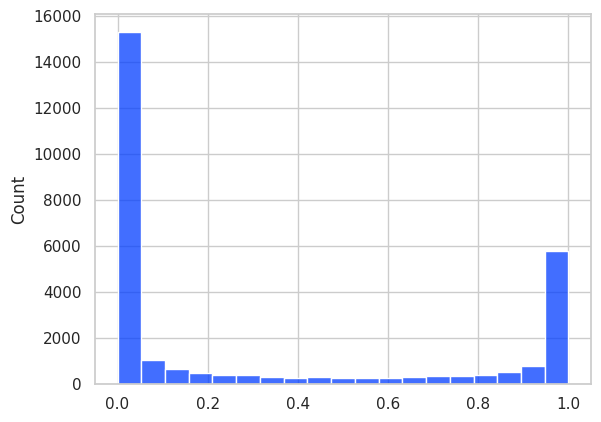

In [39]:
sns.histplot(y_pred_proba)

In [41]:
fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)

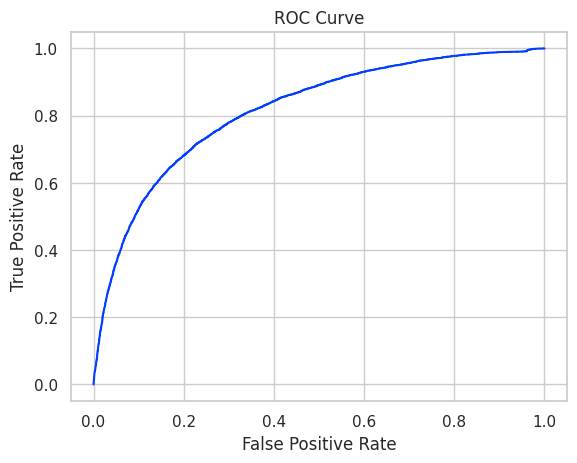

In [42]:
plt.plot(fprs, tprs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
print(f"Roc Auc Score: {roc_auc_score(y_test, y_pred)}")

Roc Auc Score: 0.7412091971171049


## Logistic Regression

In [21]:
# Initialize and train the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

### Evaluate the model

In [23]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8489114247216509


In [25]:
confusion_table(y_test, y_pred_logreg)

Truth,0,1
Predicted,,
0,20704,1160
1,3101,3237


In [26]:
true_neg, true_pos = 20704, 3237
false_neg, false_pos = 1160, 3101
overall = true_neg + true_pos + false_neg + false_pos
overall

28202

In [29]:
accuracy_logreg1 = (true_neg + true_pos) / overall
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy_logreg1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8489114247216509
Precision: 0.5107289365730514
Recall: 0.7361837616556743
F1 Score: 0.6030740568234746


In [28]:
# Classification Report
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report:")
print(class_report_logreg)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21864
           1       0.74      0.51      0.60      6338

    accuracy                           0.85     28202
   macro avg       0.80      0.73      0.75     28202
weighted avg       0.84      0.85      0.84     28202



Note: for some reason classification report from **sklearn** returnes different calculations compared with my manual imputs.

In [31]:
# ROC Curve and AUC
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fprs_logreg, tprs_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fprs_logreg, tprs_logreg)

Text(0.5, 1.0, 'ROC Curve')

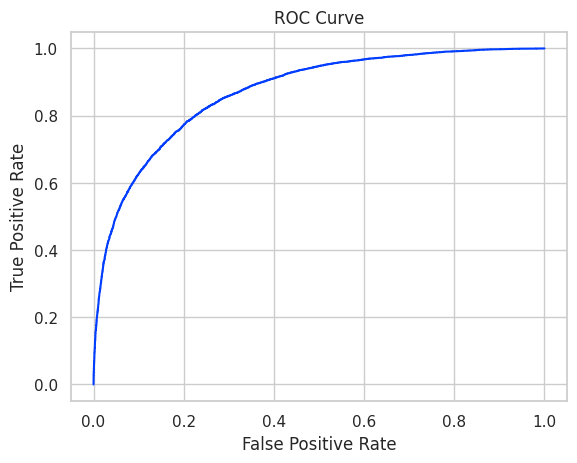

In [34]:
plt.plot(fprs_logreg, tprs_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [32]:
print(f"ROC AUC Score LogReg: {roc_auc_logreg}")

ROC AUC Score LogReg: 0.8713761680832092


ToDo:
- try different threshold ( https://www.youtube.com/watch?v=4jRBRDbJemM&t=627s )
- select important features
- feature engineering

- split test/train BEFORE imputation and scaling

# Conclusion

*   1
*   2